In [ ]:
!pip3 install matplotlib

In [1]:
import sys
import json
import math

sys.path.append("localization/")

from particle_filter import ParticleFilter
from item import Item
from field import Field

with open("localization/landmarks.json", "r") as f:
            landmarks = json.loads(f.read())
from pf_visualization import visualization

In [2]:
pf = ParticleFilter(Item(-1.8, 0.0, 0.0), Field("localization/parfield.json"), landmarks, n = 100)

In [3]:
shift = {'shift_x':0.5, 'shift_y':0.01, 'shift_yaw':0}
observations = {"yellow_posts":[[1.8, 0.55],[1.8, -0.55]], "blue_posts":[], "lines":[], "penalty":[]}
other_coord = [0.0, 0.0, 0.0]

In [4]:
pf.particles_move(shift)

eto coord after mooving (-1.3, 0.0, 0.0) 0.0


In [5]:
pf.resampling(observations)

consistency -0.2
consistency -0.4


In [6]:
pf.fall_reset(observations)

consistency -0.6000000000000001
consistency -0.8
consistency -1.0


In [ ]:
pf.return_coord()

In [ ]:
math.sin(math.pi/2)

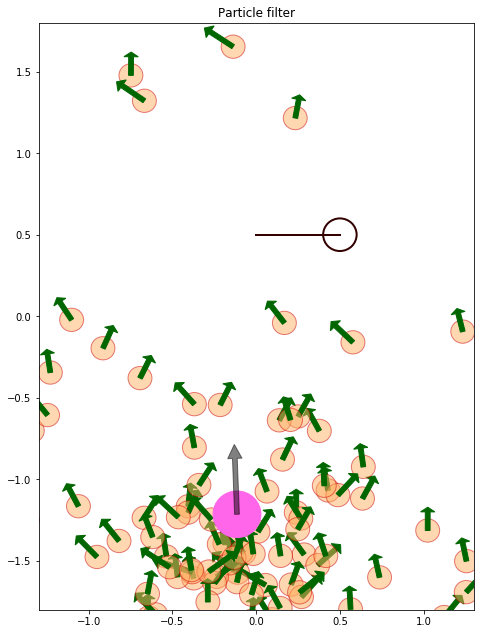

In [7]:
visualization(pf.robot, pf.particles, factor = 7)

In [ ]:
class test():
    pf1 = ParticleFilter(Robot(-1.8, 0.0, 0.0), Field("localization/parfield.json"), landmarks, n = 100)

In [ ]:
test.pf1.return_coord()

In [ ]:
logs = open('localization/logs/logs.txt','r')
log = logs.read()
logi = log.split('|')
b = " []"
vis_logs = []
for lg in logi[0::2]:
    if lg != '\n':
        particles = logi[logi.index(lg) + 1].split("\n")
        pr = []
        particles.pop()
        particles.pop(0)
        if lg.split("\n")[0].split(',')[0] == "resempling":
            pr = logi[logi.index(lg)].split("\n")[1].split("$")[1]
            for char in b:
                pr = pr.replace(char,"")
            pr = pr.split(",")
            pr = [[float(px),float(py)] for px, py in zip(pr[0::2], pr[1::2])]
        if lg[0] == '\n':
            lg = lg[1:]
        vis_logs.append(
            [lg.split("\n")[0].split(',')[0], 
                         [float(lg.split("\n")[2].split()[1]),
                        float(lg.split("\n")[2].split()[2]),float(lg.split("\n")[2].split()[3])],

                        [[float(s.split()[0]),float(s.split()[1]),float(s.split()[2])] for s in particles],
                         pr])



In [ ]:
def open_log(path):
    logs = open('localization/logs/'+str(path),'r')
    log = logs.read()
    logi = log.split('|')
    b = " []"
    vis_logs = []
    for lg in logi[0::2]:
        if lg != '\n':
            particles = logi[logi.index(lg) + 1].split("\n")
            pr = []
            particles.pop()
            particles.pop(0)
            if lg.split("\n")[0].split(',')[0] == "resempling":
                pr = logi[logi.index(lg)].split("\n")[1].split("$")[1]
                for char in b:
                    pr = pr.replace(char,"")
                pr = pr.split(",")
                pr = [[float(px),float(py)] for px, py in zip(pr[0::2], pr[1::2])]
            if lg[0] == '\n':
                lg = lg[1:]
            vis_logs.append(
                [lg.split("\n")[0].split(',')[0], 
                             [float(lg.split("\n")[2].split()[1]),
                            float(lg.split("\n")[2].split()[2]),float(lg.split("\n")[2].split()[3])],

                            [[float(s.split()[0]),float(s.split()[1]),float(s.split()[2])] for s in particles],
                             pr])




In [ ]:
vis_logs

In [ ]:
0.0 -1.2
0.0 1.2
0.0 0.4
0.0 -0.4
1.8 1.2
1.8 -1.2
-1.8 1.2
-1.8 -1.2


In [ ]:
visualization_logs(vis_logs,vis_logs[2])

In [ ]:
import matplotlib.pylab as plt
from field import Field
field = Field('localization/parfield.json')
with open("localization/landmarks.json", "r") as f:
            landmarks = json.loads(f.read())
import time
def visualization_logs(logs, log, factor = 7 ):
    plt.clf()
    plt.figure("Robot in the world",figsize=(field.w_width*3, field.w_length*3))
    plt.title(log[0] + ', step ' + str(logs.index(log)))
 
    # draw coordinate grid for plotting
    grid = [-field.w_width/2.0, field.w_width/2.0, -field.w_length/2.0, field.w_length/2.0]
    ax = plt.axis(grid)
    
    for el in field.field:
        if el == 'circles':
            for circle in field.field['circles']:
                plot_circle = plt.Circle((circle[0], circle[1]), circle[2],linewidth=2, fill=False, edgecolor='#330000')
                plt.gca().add_patch(plot_circle)
        if el == 'lines' :     
            for line in field.field['lines']:
                plot_line = plt.Line2D(line[0], line[1], linewidth=2, linestyle="-", color='#330000')
                plt.gca().add_line(plot_line)
        if el == 'rectangles' :     
            for rectangle in field.field['rectangles']:
                rect = plt.Rectangle(rectangle[0], rectangle[1], rectangle[2], linewidth=2, linestyle="-", fill = False, edgecolor='#330000')
                plt.gca().add_patch(rect)
    '''
    # draw particles
    for ind in range(len(p)):
 
        # particle
        circle = plt.Circle((p[ind][0].x, p[ind][0].y), 1./factor/2, facecolor='#ffb266', edgecolor='#994c00', alpha=0.5)
        plt.gca().add_patch(circle)
 
        # particle's orientation
        arrow = plt.Arrow(p[ind][0].x, p[ind][0].y, 2*math.cos(p[ind][0].yaw)/factor, 2*math.sin(p[ind][0].yaw)/factor, width=1/factor, alpha=1., facecolor='#994c00', edgecolor='#994c00')
        plt.gca().add_patch(arrow)
    '''
    # draw predicted landmarks
    if log[0] == "resempling":
        for lg in log[3]:
            circle = plt.Circle((lg[1], lg[0]), 1./factor/2, facecolor='#330000', edgecolor='#330000')
            plt.gca().add_patch(circle)
          
          
    
    # draw resampled particles
    for lg in log[2]:
 
        # particle
        circle = plt.Circle((lg[1], lg[0]), 1./factor/2, facecolor='#ffb266', edgecolor='#cc0000', alpha=0.5)
        plt.gca().add_patch(circle)
 
        # particle's orientation
        arrow = plt.Arrow(lg[1], lg[0], 2*math.sin(lg[2])/factor, math.cos(lg[2])/factor,width=1/factor, alpha=1., facecolor='#006600', edgecolor='#006600')
        plt.gca().add_patch(arrow)
 

    # robot's location
    circle = plt.Circle((log[1][1], log[1][0]), 1./factor, facecolor='#FF66E9', edgecolor='#FF66E9')
    plt.gca().add_patch(circle)
 
    # robot's orientation
    arrow = plt.Arrow(log[1][1], log[1][0], 3*math.sin(log[1][2])/factor, 3*math.cos(log[1][2])/factor, width=1/factor, alpha=0.5, facecolor='#000000', edgecolor='#000000')
    plt.gca().add_patch(arrow)
 
   

    for lm in landmarks:
        for lms in landmarks[lm]:
            circle = plt.Circle(((lms[1], lms[0])), 
                                1./factor/2, facecolor = '#060C73', edgecolor='#060C73')
            plt.gca().add_patch(circle)
    
 
    #plt.savefig("figure_" + str(logs.index(log)) + ".png")

   

In [ ]:
vis_logs[1]